Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy stat

The company requires:
1. To model the demand for shared bikes with the available independent variables. 
2. It will be used by the management to understand how exactly the demands vary with different features. 
3. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
4. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
eBusiness Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new marke. 


#### Step 0 -> Importing Libraries and Reading Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Reading the data from csv file
bike_sharing = pd.read_csv("day.csv")

## Step 1: Understanding and Cleaning the Data

#Read the head of the data
bike_sharing.head()

In [7]:
#Check the shape of the dataset
bike_sharing.shape

(730, 16)

In [8]:
#Check the info of the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Describe the dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Check the null values of the dataset in each column
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
#Check the null values of the dataset in each row
round((bike_sharing.isnull().sum(axis=1)/len(bike_sharing))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
480    0.0
478    0.0
501    0.0
477    0.0
458    0.0
459    0.0
460    0.0
461    0.0
462    0.0
463    0.0
464    0.0
465    0.0
466    0.0
467    0.0
468    0.0
469    0.0
470    0.0
471    0.0
472    0.0
473    0.0
474    0.0
475    0.0
476    0.0
500    0.0
502    0.0
547    0.0
525    0.0
527    0.0
528    0.0
529    0.0
530    0.0
531    0.0
532    0.0
533    0.0
534    0.0
535    0.0
536    0.0
537    0.0
538    0.0
539    0.0
540    0.0
541    0.0
542    0.0
543    0.0
544    0.0
545    0.0
526    0.0
524    0.0
503    0.0
523    0.0
504    0.0
505    0.0
506    0.0
507    0.0
508    0.0
509    0.0
510    0.0
511    0.0
512    0.0
513    0.0
514    0.0
515    0.0
516    0.0
517    0.0
518    0.0
519    0.0
520    0.0
521    0.0
522    0.0
457    0.0

In [12]:
# Check for the duplicate records and drop if any 
print('Total records - {} '.format(len(bike_sharing.value_counts())))
print('Total duplicate - {} '.format(len(bike_sharing[bike_sharing.duplicated()])))

Total records - 730 
Total duplicate - 0 


In [13]:
# Remove instant as it just an index column and not useful for analysis
bike_sharing.drop(['instant'], axis=1, inplace=True)

# Drop dteday column as it is not useful for analysis , we have month and year in seperate columns
bike_sharing.drop(['dteday'], axis=1, inplace=True)

# Drop casual and registered column as we have sum of it in cnt column as per the data dictionary document
bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)

In [14]:
#Checking the head of the dataset to confirm if columns are dropped
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Converting columns - season, mnth, weekday and weathersit to categorical variables as advised in the problem statement

In [16]:
# As per the data dictionary document, converting seasons into actual names spring,summer,fall,winter
print(bike_sharing.season.unique())
season_var = ['season']
# Defining the mapping of the function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Apply the defined function to season
bike_sharing[season_var] = bike_sharing[season_var].apply(season_map)
print(bike_sharing.season.unique())

# Checking for updated values
print(bike_sharing[season_var].value_counts())

[1 2 3 4]
['spring' 'summer' 'fall' 'winter']
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [17]:
# Converting mnth values into actual months names
print(bike_sharing.mnth.unique())

# Replacing mnth values
bike_sharing['mnth'].replace({1:"January",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July", 8:"August",9:"September", 10:"October",11:"November", 12:"December"},inplace=True)

# Checking for updated values
print(bike_sharing[['mnth']].value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
mnth     
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
Feb          56
Name: count, dtype: int64


In [18]:
# Converting weekday column values to actual weekday names
print(bike_sharing.weekday.unique())
weekdayVar = ['weekday']

# Defining the mapping of the function for weekday
def weekday_map(x):
    return x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday'})

# Apply the function to weekday column
bike_sharing[weekdayVar] = bike_sharing[weekdayVar].apply(weekday_map)
print(bike_sharing.weekday.unique())

# Checking for updated values
print(bike_sharing[weekdayVar].value_counts())

[6 0 1 2 3 4 5]
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
weekday  
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: count, dtype: int64


In [19]:
# Converting weatherlist column values to the names as per the data dictionary document
print(bike_sharing.weathersit.unique())

weathersitVar = ['weathersit']
# Defining the mapping of the function for weathersit
def weathersit_map(x):
    return x.map(
        {
            1: 'Clear_Few-clouds',
            2: 'Mist-Cloudy_Mist-Broken',
            3: 'Light-Snow_Light-Rain-Thunderstorm',
            4: 'Heavy-Rain-Ice-Pallets-Thunderstorm'
        })

# Apply the function to weathersit
bike_sharing[weathersitVar] = bike_sharing[weathersitVar].apply(weathersit_map)
print(bike_sharing.weathersit.unique())

# Check if values are updated
print(bike_sharing[weathersitVar].value_counts())

[2 1 3]
['Mist-Cloudy_Mist-Broken' 'Clear_Few-clouds'
 'Light-Snow_Light-Rain-Thunderstorm']
weathersit                        
Clear_Few-clouds                      463
Mist-Cloudy_Mist-Broken               246
Light-Snow_Light-Rain-Thunderstorm     21
Name: count, dtype: int64


In [20]:
#checking the detailed info of the updated dataaset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 2: Visualising the Data

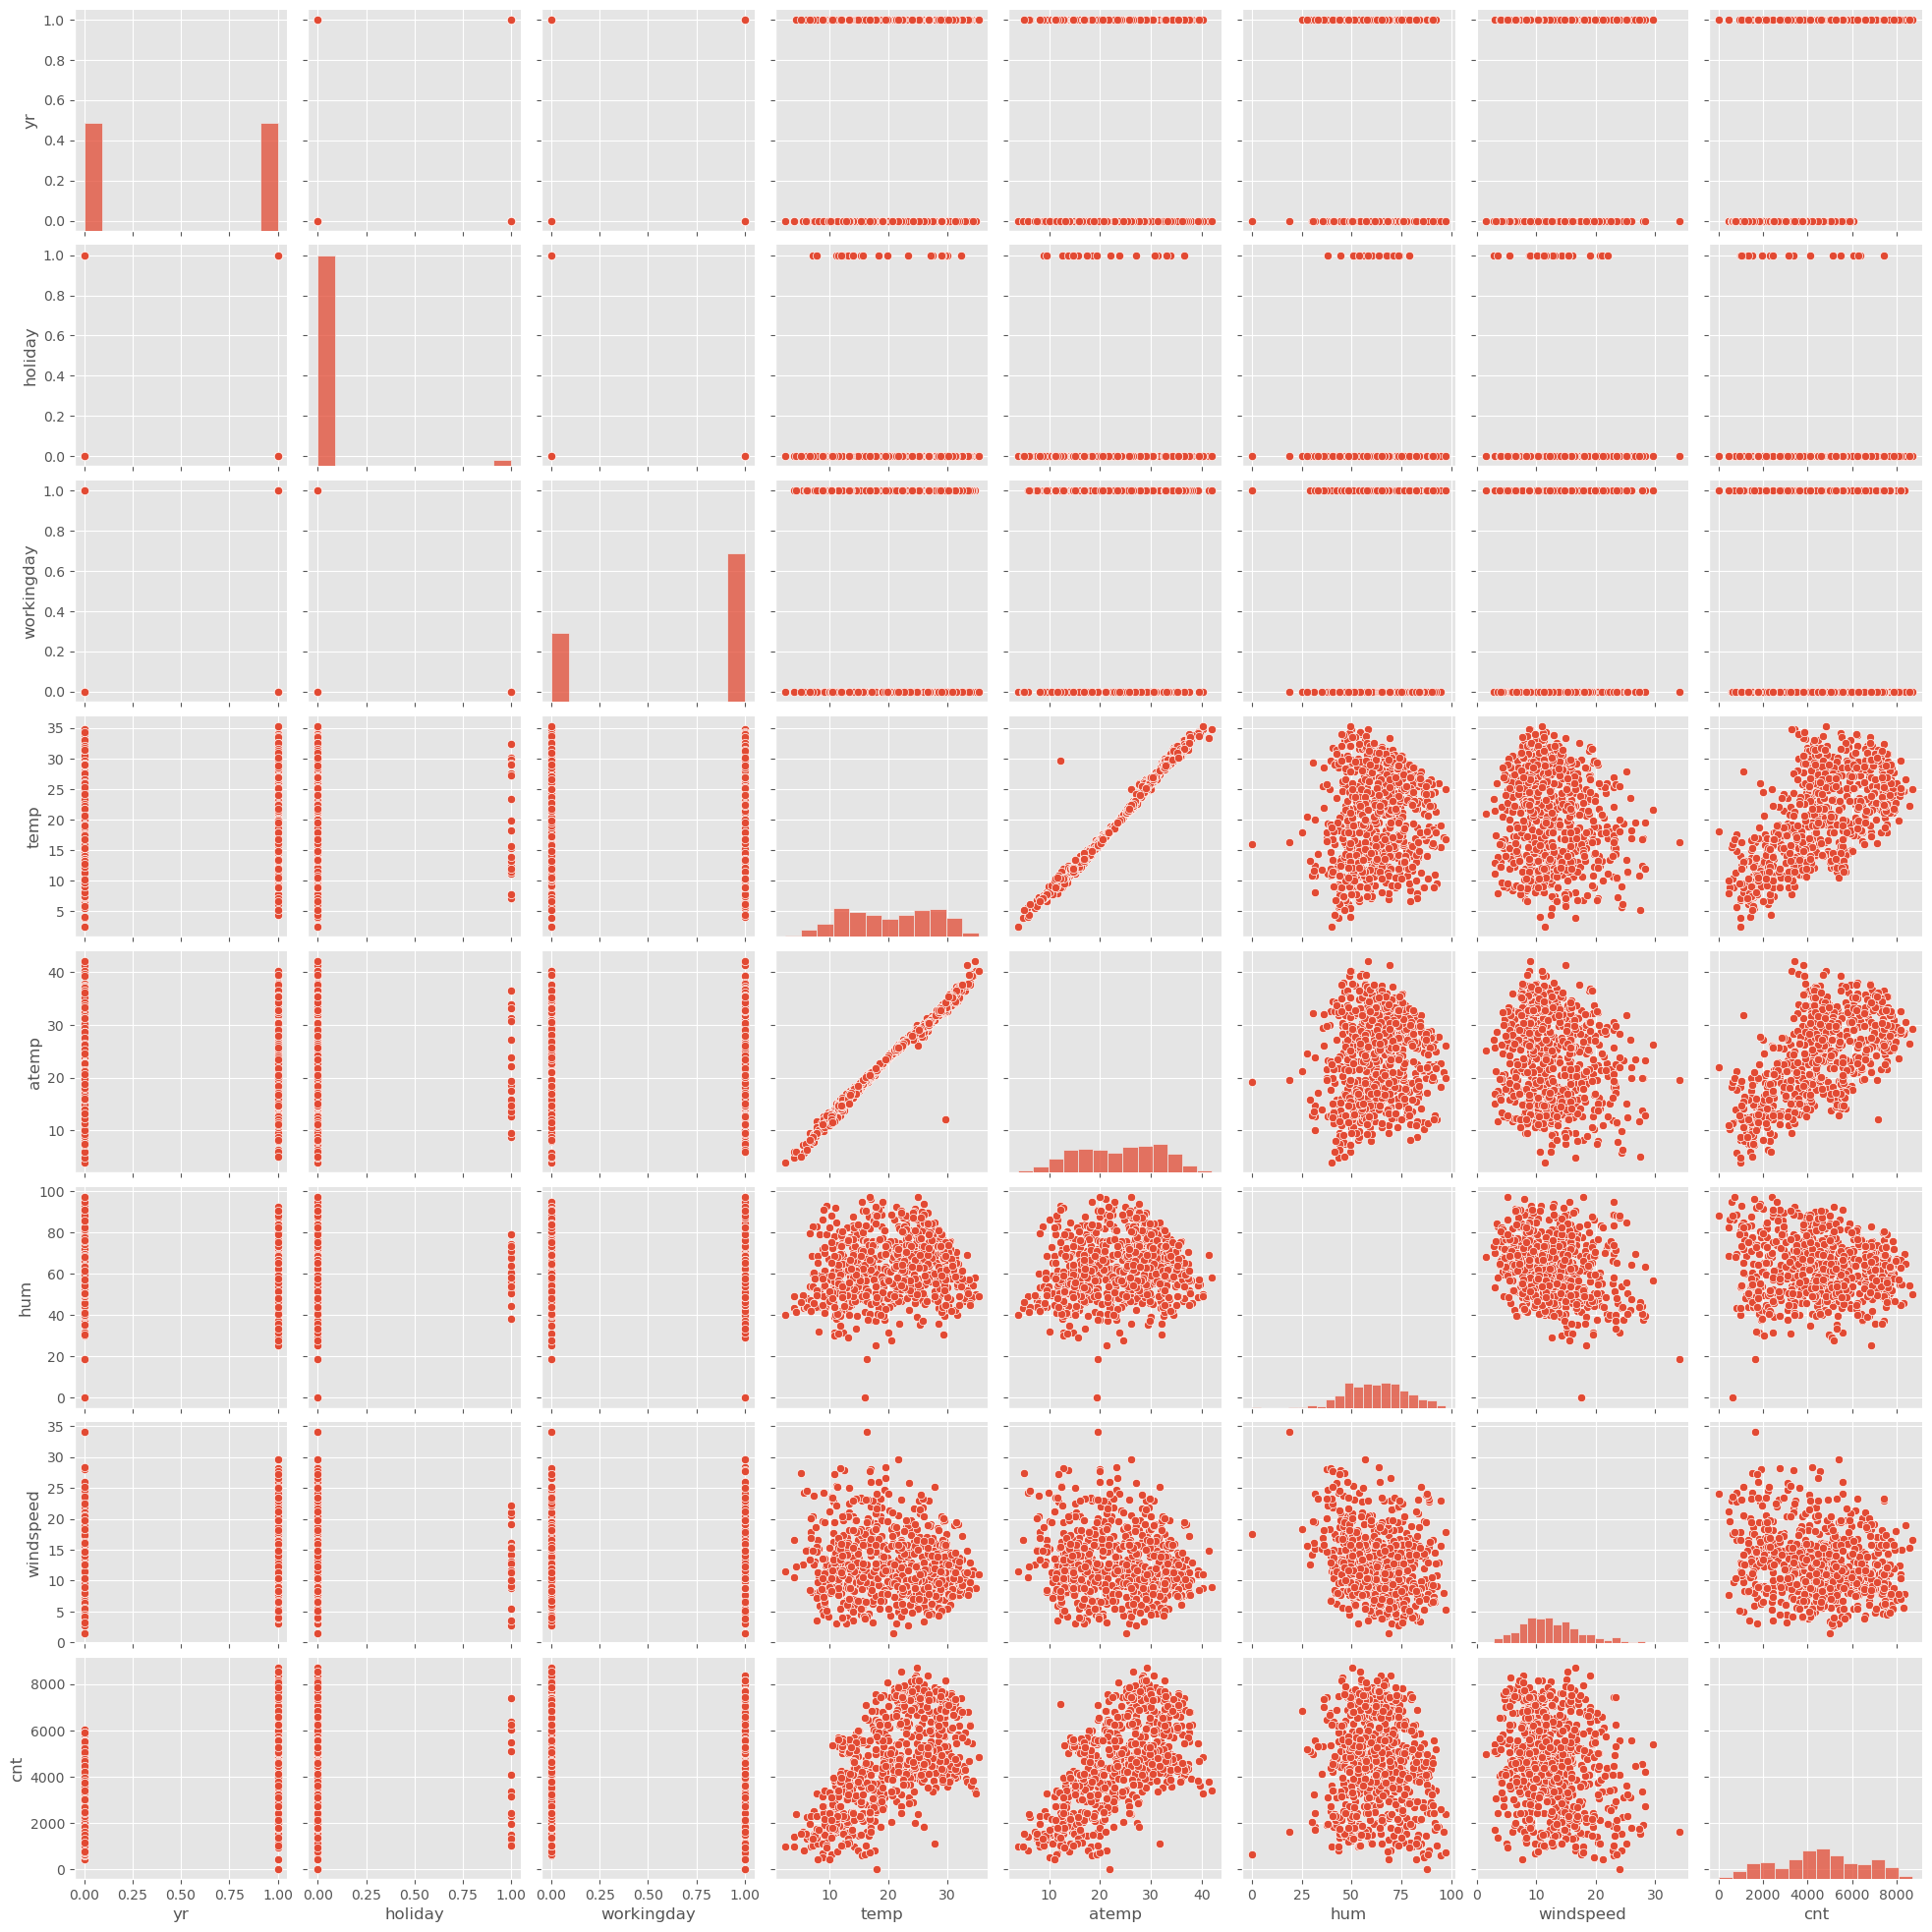

In [22]:
# Create a Pair plot for all the varaibles
sns.pairplot(bike_sharing)
plt.show()

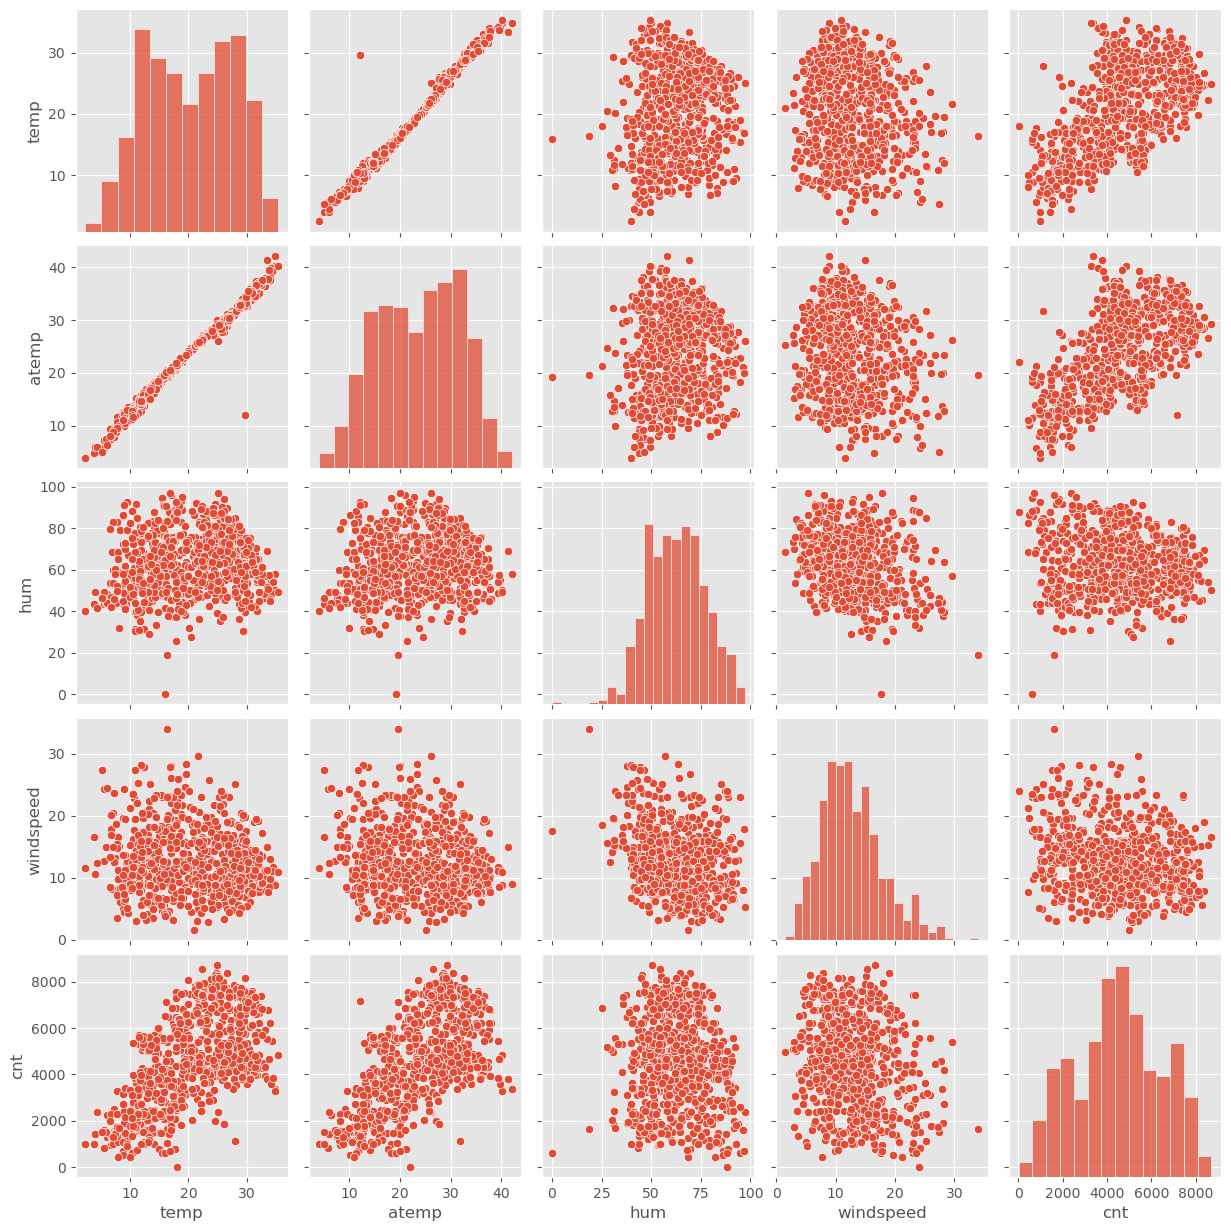

In [23]:
# Creating a pairplot of all the numeric variables and exculde the boolean variables 
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_sharing[numeric_variables])
plt.show()

Inference :  Both temp and atemp are highly correlated with cnt

yr                                               0
holiday                                          0
workingday                                       0
temp                                             0
atemp                                            0
hum                                              0
windspeed                                        0
cnt                                              0
season_spring                                    0
season_summer                                    0
season_winter                                    0
mnth_August                                      0
mnth_December                                    0
mnth_Feb                                         0
mnth_January                                     0
mnth_July                                        0
mnth_June                                        0
mnth_March                                       0
mnth_May                                         0
mnth_November                  

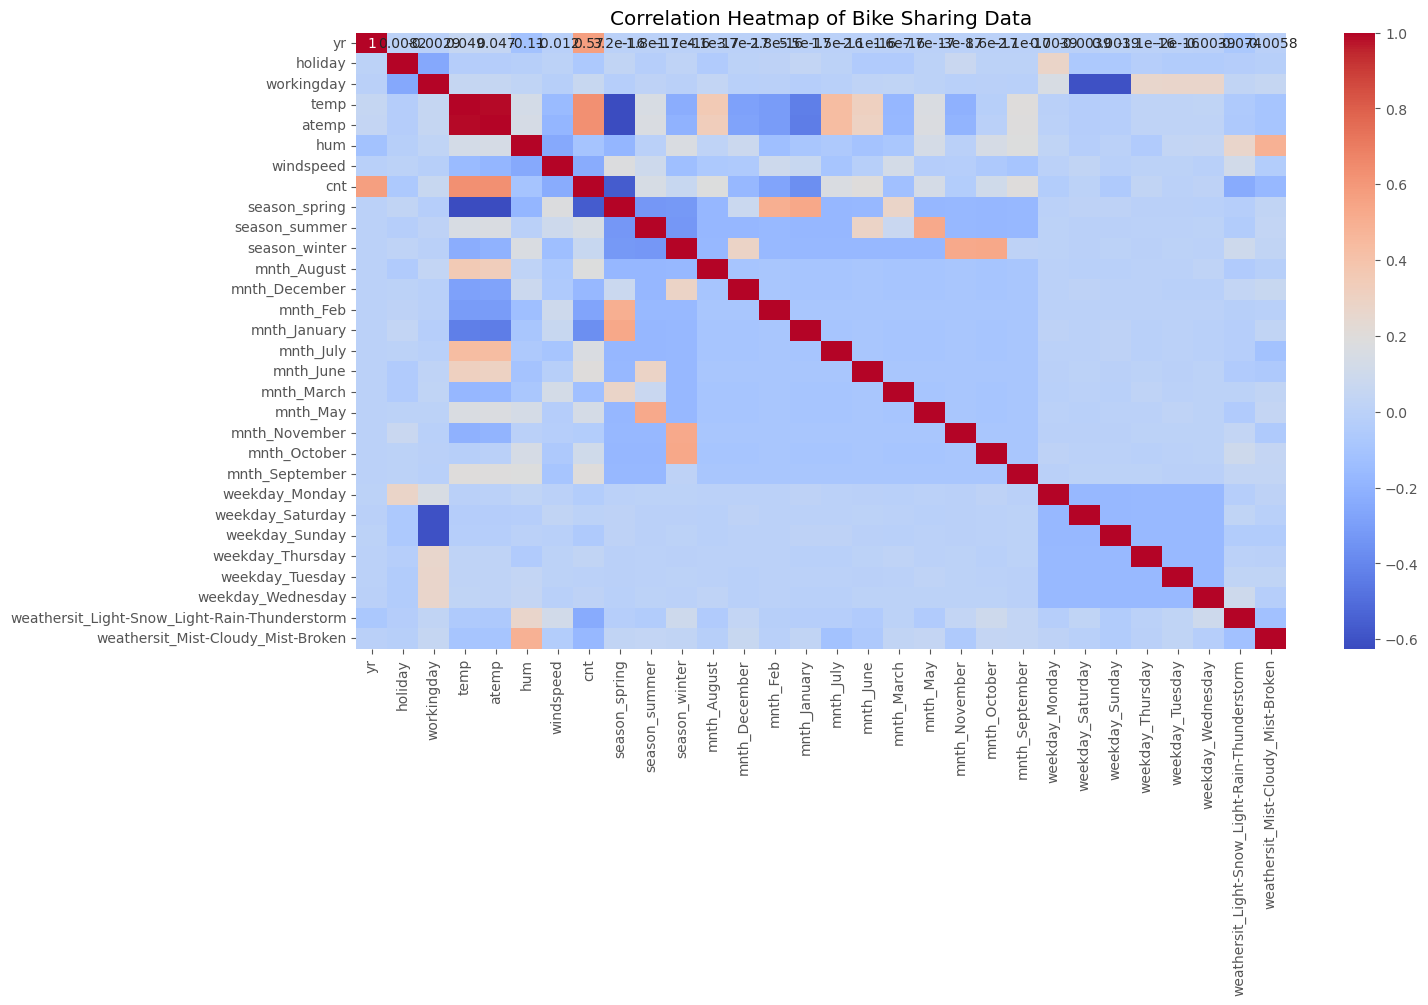

In [25]:
# Plot a heatmap to check correlation
bike_sharing_encoded = pd.get_dummies(bike_sharing, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
print(bike_sharing_encoded.isnull().sum())
plt.figure(figsize=(15, 8))
sns.heatmap(bike_sharing_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bike Sharing Data')
plt.show()

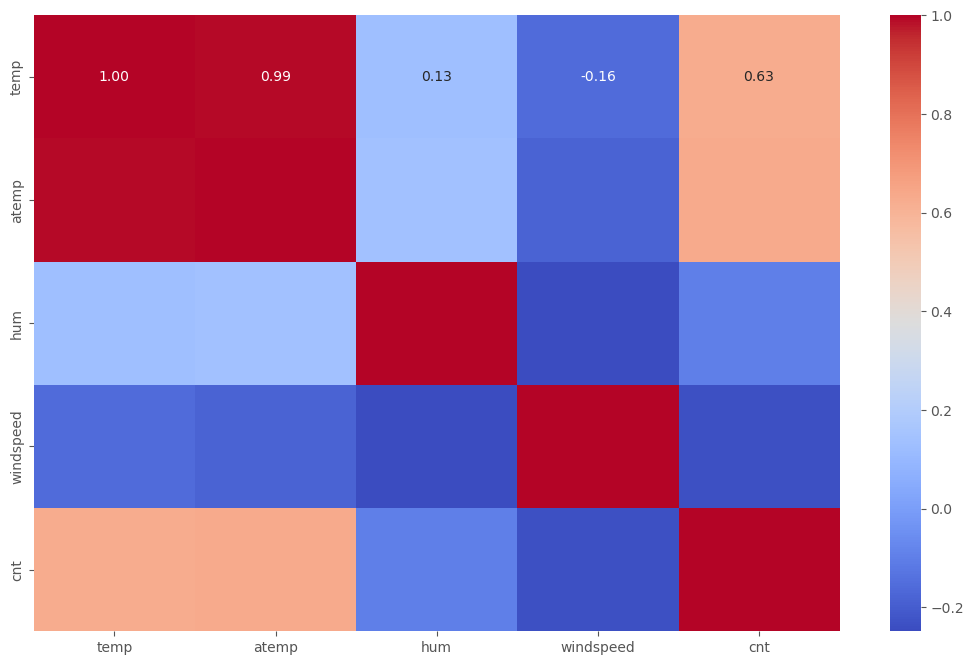

In [26]:
# Plot a heatmap to check correlation of numeric variables
plt.figure(figsize=(13, 8))
sns.heatmap(bike_sharing[numeric_variables].corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, cbar=True)
plt.show()

In [27]:
# The heatmap indicates the correlation between temp and atemp is highly co-related. So, dropping one column as multicollinearity is visible.
# Dropping temp column
bike_sharing.drop(['temp'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist-Cloudy_Mist-Broken,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist-Cloudy_Mist-Broken,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few-clouds,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few-clouds,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few-clouds,11.46350,43.6957,12.522300,1600


Plotting to visualize Categorical Variables .

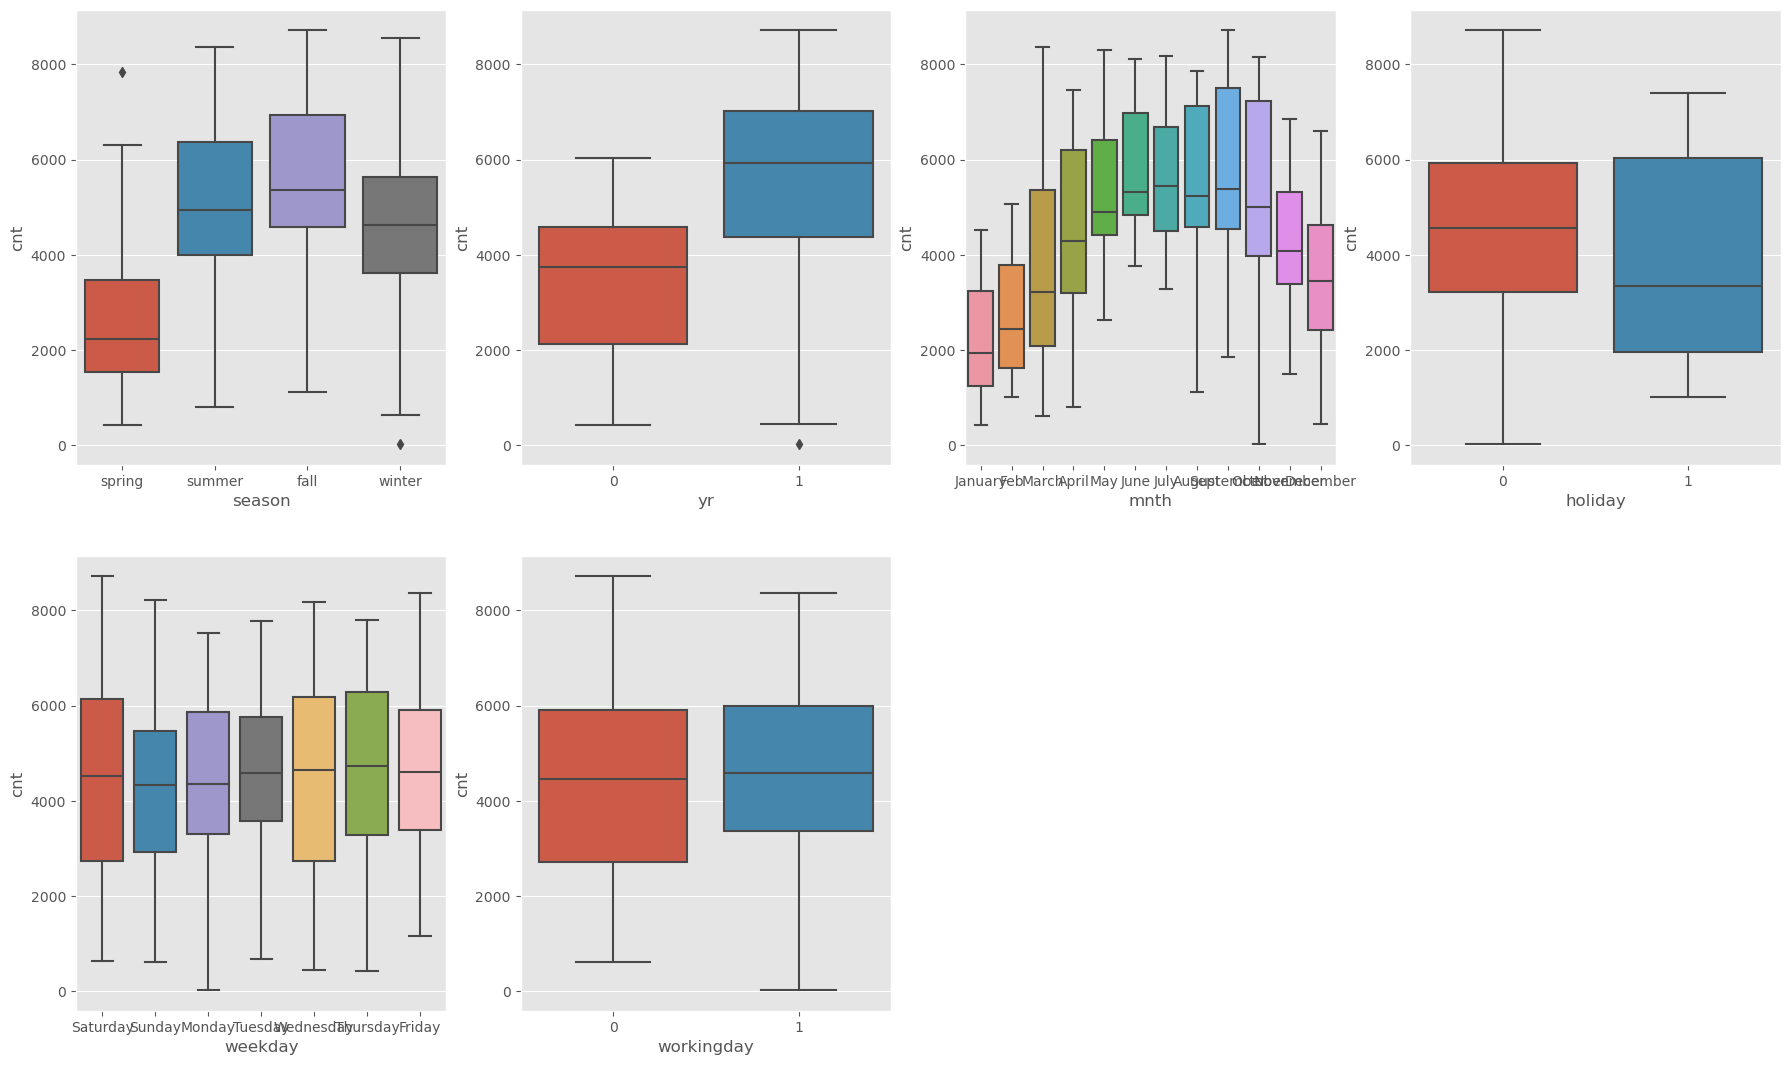

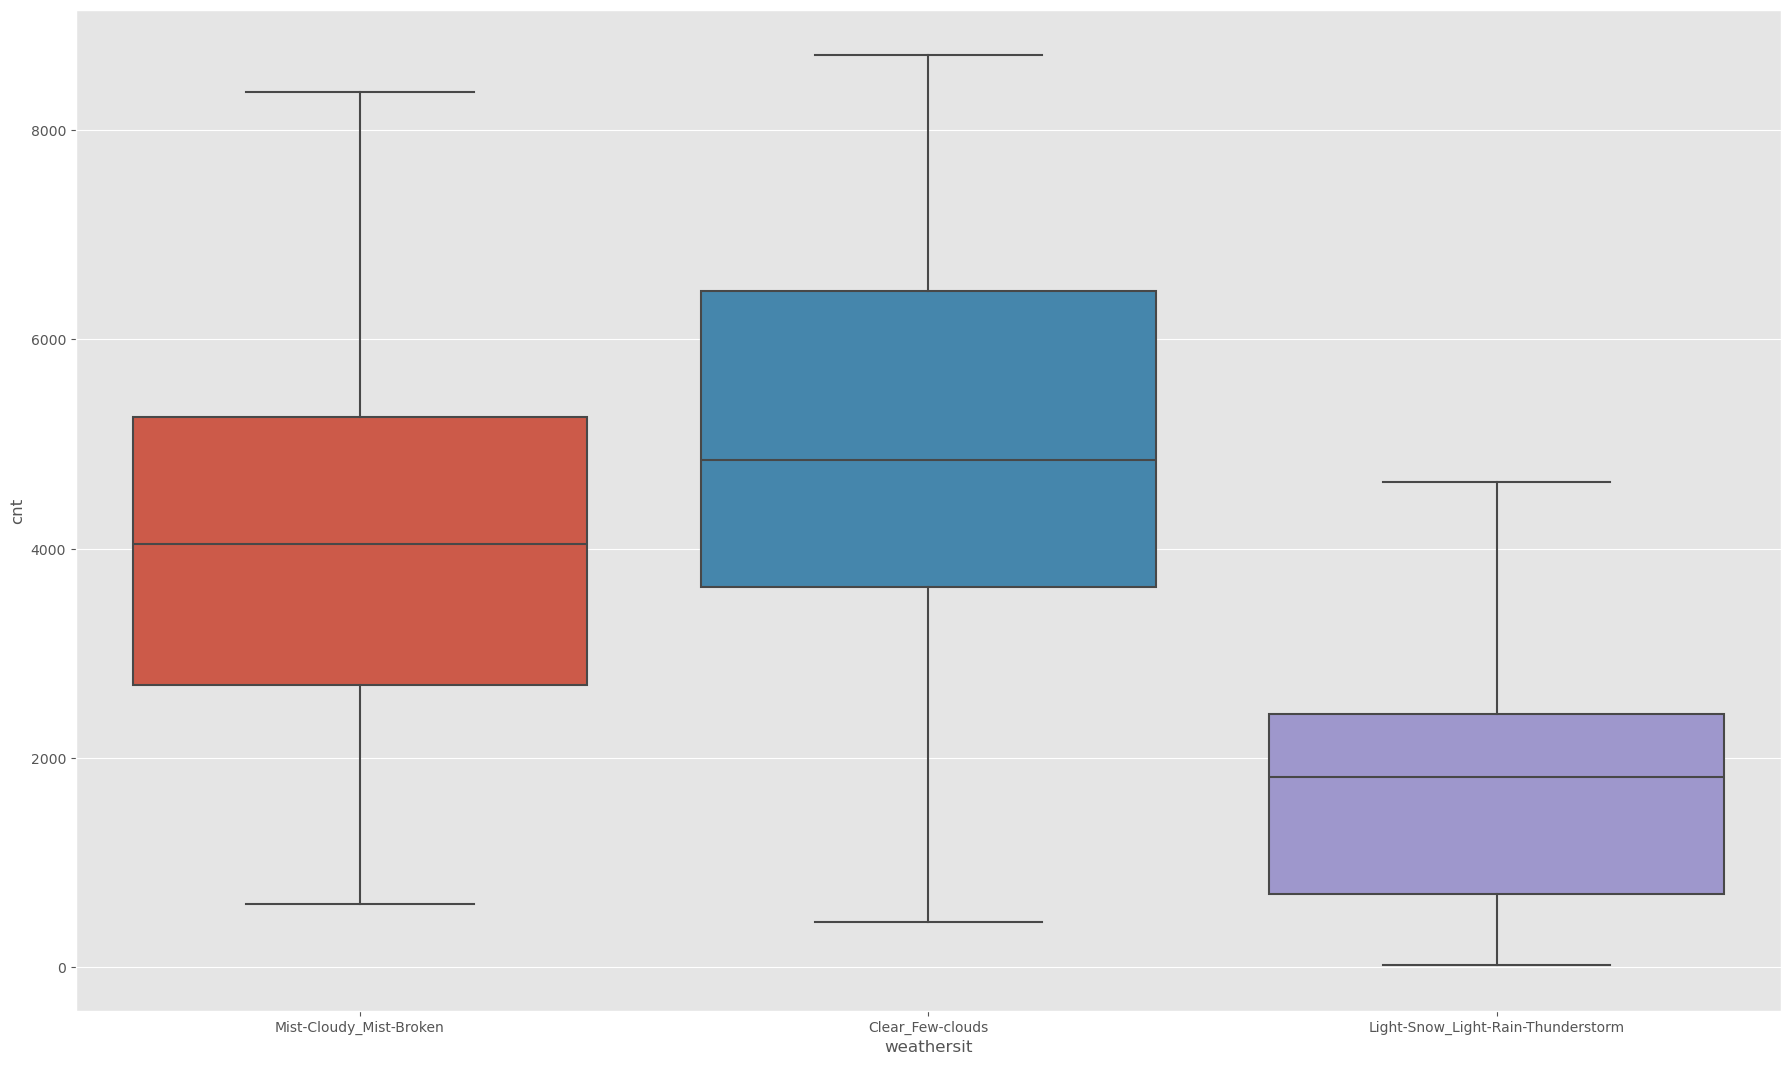

In [29]:
# creating a subplot with 2 rows and 3 columns to visulize the categorical variables

plt.figure(figsize=(22, 13))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(2,4,2)
# plt.xticks([0,1], ["2018", "2019"])
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(2,4,3)
# plt.xticks(rotation=45)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(2,4,5)
# plt.xticks(rotation=45)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

# let's take weathersit into different subplot as it has big x labels.
plt.figure(figsize=(22, 13))
plt.subplot(1,1,1)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

plt.show()

#### Inference
-   There is a low demand in spring and high demand in fall season
-   There was a high demand in 2019 and low in 2018
-   There was a high demand in month of August, Sepember, Octocer and low in Januray
-   There is a high demand in Weekend and holidays 
-   There is not much change in Day wise demand
-   There is not much change in Workingdays wise 
-   weathersit - 
    -   High demand with - "Clear, Few clouds" 
    -   low demand with "Light Snow, Light Rain"eekdays
ght Rain"

#### Step 3: Data Preparation

#### Dummy variables

In [33]:
# Checking the shape before getting started
print(bike_sharing.shape)
bike_sharing.to_csv("day2.csv", index=False, header=False)


(730, 11)


In [34]:
# Creating a list of columns to create dummies where it is possible

dummy_columns_list = ['season', 'mnth', 'weekday', 'weathersit']

# Creating the dummies for the above mentioned columns
dummies = pd.get_dummies(bike_sharing[dummy_columns_list], drop_first=True)

# Concatanating dummies with original dataset
bike_sharing = pd.concat([bike_sharing, dummies], axis=1)

# Dropping the original columns after creating dummies
bike_sharing.drop(dummy_columns_list, axis=1, inplace=True)

# Checking the column after creating dummies
print(bike_sharing.columns)
bike_sharing.head()


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_Feb', 'mnth_January', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [35]:
# Converting boolean columns to integers
bike_sharing[['season_spring', 'season_summer','season_winter','mnth_August']] = bike_sharing[['season_spring', 'season_summer','season_winter','mnth_August']].astype(int)
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [36]:
print(bike_sharing.shape)

(730, 29)


In [37]:
# Converting boolean columns to integers
bike_sharing[['mnth_Feb','mnth_January','mnth_July','mnth_June','mnth_March','mnth_May','mnth_November','mnth_October','mnth_September','weekday_Monday','weekday_Saturday','weekday_Sunday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday','weathersit_Light-Snow_Light-Rain-Thunderstorm','weathersit_Mist-Cloudy_Mist-Broken']] = bike_sharing[['mnth_Feb','mnth_January','mnth_July','mnth_June','mnth_March','mnth_May','mnth_November','mnth_October','mnth_September','weekday_Monday','weekday_Saturday','weekday_Sunday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday','weathersit_Light-Snow_Light-Rain-Thunderstorm','weathersit_Mist-Cloudy_Mist-Broken']].astype(int)	
bike_sharing[['mnth_December']] = bike_sharing[['mnth_December']].astype(int)
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Dataset into Training and Testing Sets

In [39]:
# Splitting the dataset into train and test set , assigning it the different variables
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=100)

#Checking the shape of train and test set
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [40]:
# checking the data of train data set
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [41]:
# Checking the data of test data set

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


###  Rescaling the FeaturesSscaling doesn't impact our mode, so  scainge the numeric columns to have comparable scale.

Min-Max scaling (normalisation) - Between 0 and 1 (Preffered way as it take care the outliers)

In [43]:
# Instantiating scaler object

scaler = MinMaxScaler()

In [44]:
# Applying scaler() to all the columns except theose contains 0 or 1 value

# Finding the columns those does not have 0 or 1 value
columns_to_scale = bike_sharing.loc[:, (~bike_sharing.isin([0,1]).all())].columns
print(columns_to_scale)

# Creating a list of variables to scale
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# fit_transform to train data set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


Index(['atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


In [45]:
# Checking the train dataset after scalling
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


-   All the values are converted between 0 and 1 as can be seen

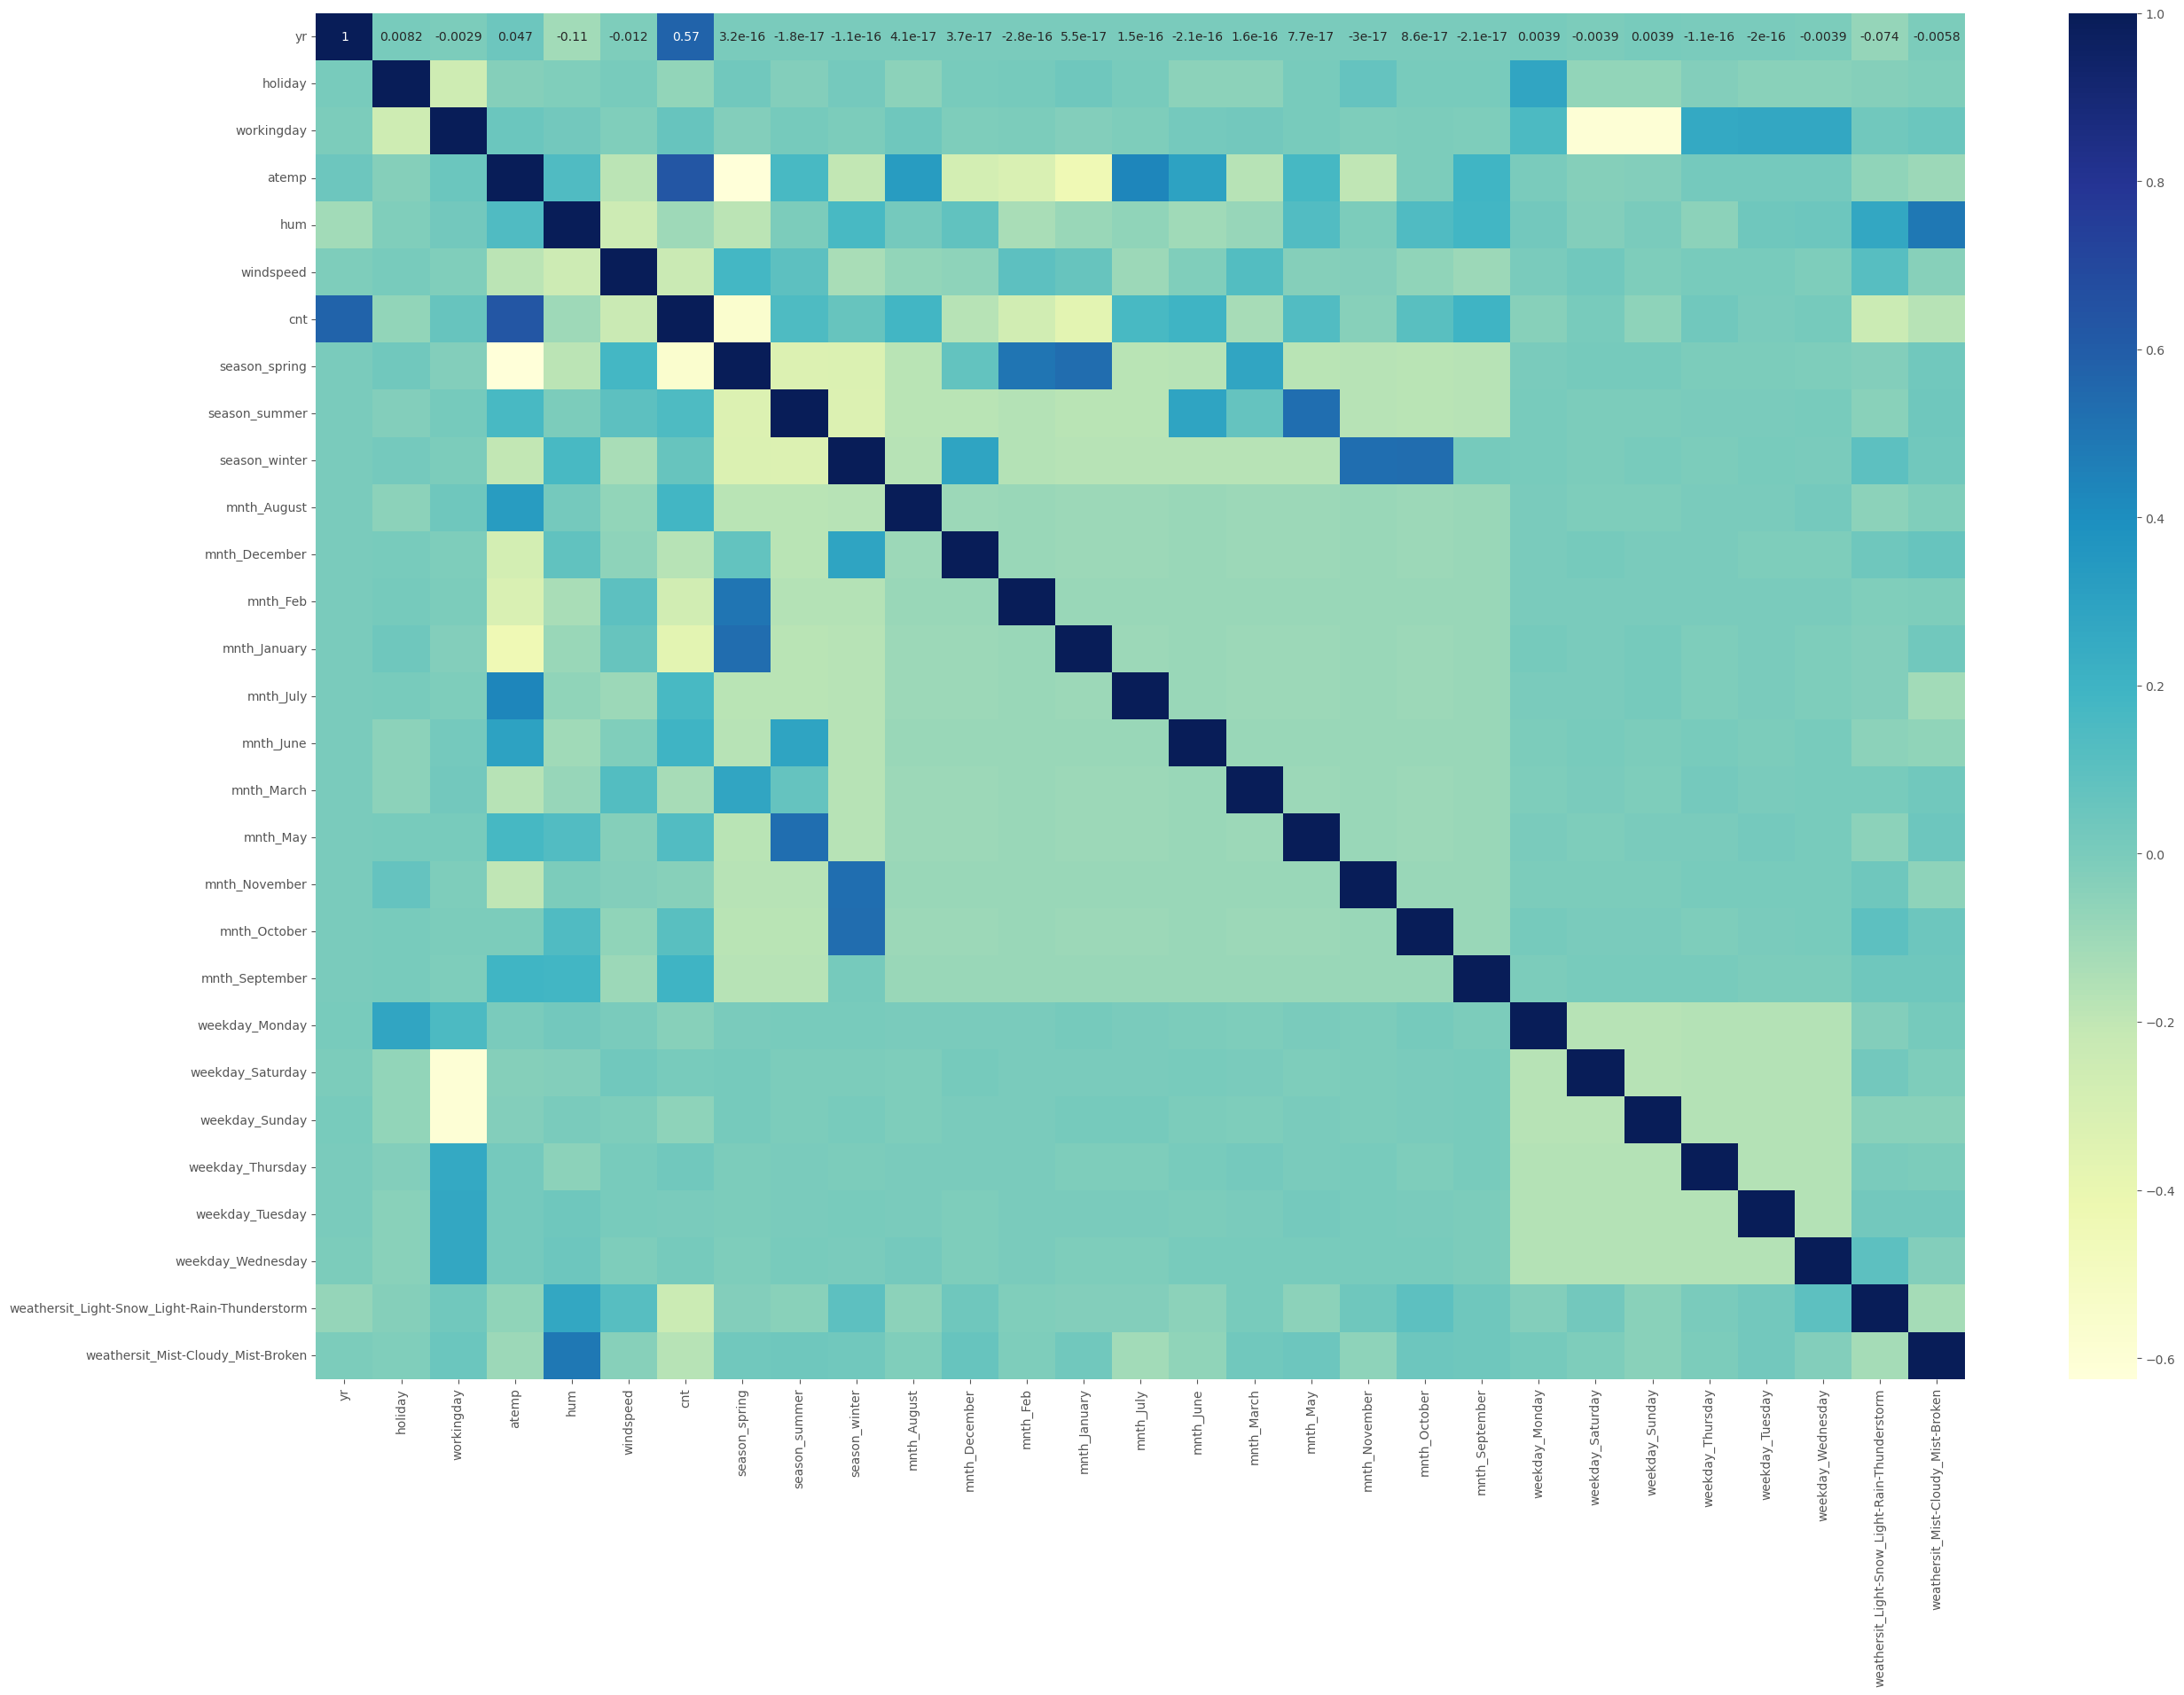

In [47]:
# checking the correlation coefficients for all variables to see which variables are highly correlated

plt.figure(figsize = (30, 20))
# plt.xticks(rotation=45)
sns.heatmap(data=bike_sharing.corr(), annot=True, cmap='YlGnBu')
plt.show()

Inference:

atemp is highly correlated with c
Plotting to 

Let's see a scatter for atemp vs cnt.

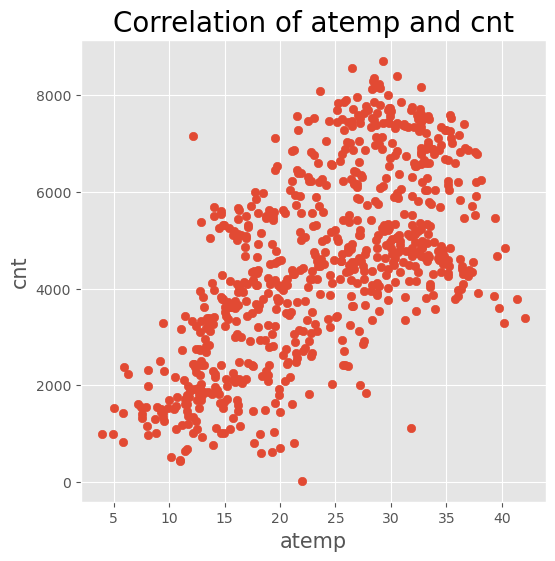

In [49]:
# Creating a scatter plot
plt.figure(figsize=[6,6])
plt.scatter(bike_sharing.atemp, bike_sharing.cnt)
plt.title('Correlation of atemp and cnt', fontsize = 20)                  # Plot heading 
plt.xlabel('atemp', fontsize = 15)  
plt.ylabel('cnt', fontsize = 15) 
plt.show()

### Dividing into X and Y sets for the model building

In [51]:
# Creating x and y train from df_train set

y_train = df_train.pop('cnt')
X_train = df_train

# Checking the shape of X and y train dataset
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


## Step 5: Building a linear model

There are three way to start with -
-   Forward approach                        - start with one variable and keep adding
-   Backward approach                       - Add all the variables and remove one by one
-   RFE - Recursive feature elimination     - Select the variable based on significance

We have 29 variable in the dataset and going with forward or backward approach would be time consuming. So let's use RFE to select the significant variables.

In [53]:
# Running RFE with the output number of the variable equal to 15

# Creating object of lm
lm = LinearRegression()

# Fitting x_train and y_train to lm object
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 14),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light-Snow_Light-Rain-Thunderstorm', True, 1),
 ('weathersit_Mist-Cloudy_Mist-Broken', True, 1)]

In [54]:
# Extracting the high significants columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [55]:
# Let's check the list of insignificant columns
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_August', 'mnth_Feb', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### MODEL 1

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable to the x train dataset
X_train_sm = sm.add_constant(X_train_rfe)

In [60]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [61]:
# Running the linear model by providing y and x train dataset
lm = sm.OLS(y_train, X_train_sm).fit()

# checking the parameters of lm
lm.params

const                                            0.366172
yr                                               0.232598
holiday                                         -0.084117
atemp                                            0.446979
hum                                             -0.147689
windspeed                                       -0.169162
season_spring                                   -0.106986
season_winter                                    0.066155
mnth_December                                   -0.048480
mnth_January                                    -0.051525
mnth_July                                       -0.067871
mnth_November                                   -0.050182
mnth_September                                   0.058559
weekday_Saturday                                 0.018187
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.250410
weathersit_Mist-Cloudy_Mist-Broken              -0.058230
dtype: float64

In [62]:
# Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.67e-187
Time:                        23:36:31   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inferennce :
-   R-squared is high and good for prediction
-   p-value close to 0 is good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good

Looking at the p-values, it looks like some of the variables (holiday) is insignificant.
We can simply drop the variable with the high p value.
A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_winter,2.93
5,season_spring,2.89
14,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.06
10,mnth_November,1.82
8,mnth_January,1.75
7,mnth_December,1.54


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

See from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a very highVIF of `95.41`. Let's go ahead and drop this variables

Drop criteria:

1) High p-value and high VIF

2) High-low :
   >   i)  High P, Low VIF - Drop this first<br>
   >   ii) Low P-Value, High VIF - Drop this after above<br>

3) Low p and low VIF

In [70]:
# Drop holiday as it has high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [71]:
# Check the columns list after dropping holiday
X_train_new.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Saturday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

#### Model 2
Let's repeat the process after removing a variable and check the p-value and VIF again

Observation :
-   VIF value is significantly decreased after removing workingday

In [74]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.67e-187
Time:                        23:36:32   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [75]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [76]:
# Running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const                                            0.365731
yr                                               0.232961
atemp                                            0.446508
hum                                             -0.148456
windspeed                                       -0.170705
season_spring                                   -0.109464
season_winter                                    0.066086
mnth_December                                   -0.049376
mnth_January                                    -0.052539
mnth_July                                       -0.067037
mnth_November                                   -0.057250
mnth_September                                   0.054864
weekday_Saturday                                 0.020711
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.247291
weathersit_Mist-Cloudy_Mist-Broken              -0.056794
dtype: float64

In [77]:
# Let's see the summary of our linear model2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.24e-185
Time:                        23:36:32   Log-Likelihood:                 503.47
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     495   BIC:                            -913.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observation :

-   R-squared high and good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good
-   p-value is gignificantly increased for `weekday_Saturday`

In [79]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.07
1,atemp,16.88
3,windspeed,4.03
5,season_winter,2.93
4,season_spring,2.88
13,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.06
9,mnth_November,1.79
7,mnth_January,1.75
6,mnth_December,1.54


#### Model 3

Let's repeat the process after removing a variable and check the p-value and VIF again


In [81]:
# Drop weekday_Saturday
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Let's check the column list after dropping weekday_Saturday
X_train_new.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [82]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.07
1,atemp,16.83
3,windspeed,3.99
5,season_winter,2.93
4,season_spring,2.88
12,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.06
9,mnth_November,1.79
7,mnth_January,1.75
6,mnth_December,1.54


In [83]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

In [84]:
# Running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [85]:
# Checking the parameter of the model lm3
lm3.params

const                                            0.370603
yr                                               0.232432
atemp                                            0.446548
hum                                             -0.152332
windspeed                                       -0.169103
season_spring                                   -0.109529
season_winter                                    0.066658
mnth_December                                   -0.048235
mnth_January                                    -0.051891
mnth_July                                       -0.066654
mnth_November                                   -0.057955
mnth_September                                   0.055142
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.245537
weathersit_Mist-Cloudy_Mist-Broken              -0.056010
dtype: float64

In [86]:
# Let's see the summary of our linear model3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.65e-186
Time:                        23:36:32   Log-Likelihood:                 501.73
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Model 4

In [88]:
# Checking the columns in the training dataset
X_train_new.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [89]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.07
1,atemp,16.83
3,windspeed,3.99
5,season_winter,2.93
4,season_spring,2.88
12,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.06
9,mnth_November,1.79
7,mnth_January,1.75
6,mnth_December,1.54


In [90]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Checking the parameter of lm4
lm4.params

const                                            0.370603
yr                                               0.232432
atemp                                            0.446548
hum                                             -0.152332
windspeed                                       -0.169103
season_spring                                   -0.109529
season_winter                                    0.066658
mnth_December                                   -0.048235
mnth_January                                    -0.051891
mnth_July                                       -0.066654
mnth_November                                   -0.057955
mnth_September                                   0.055142
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.245537
weathersit_Mist-Cloudy_Mist-Broken              -0.056010
dtype: float64

In [91]:
# Let's see the summary of our linear model4

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.65e-186
Time:                        23:36:32   Log-Likelihood:                 501.73
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inference:
No p-value is greater than 0.05

#### Model 5

Now we will drop high VIF variables as we are done with high p-value

In [94]:
# Drop hum as it has high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['yr', 'atemp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [95]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.57
2,windspeed,3.95
4,season_winter,2.55
3,season_spring,2.34
0,yr,2.06
8,mnth_November,1.77
6,mnth_January,1.65
11,weathersit_Mist-Cloudy_Mist-Broken,1.53
5,mnth_December,1.46
7,mnth_July,1.35


In [96]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.params

const                                            0.292594
yr                                               0.236070
atemp                                            0.410930
windspeed                                       -0.143023
season_spring                                   -0.112230
season_winter                                    0.057974
mnth_December                                   -0.053943
mnth_January                                    -0.057243
mnth_July                                       -0.058775
mnth_November                                   -0.057552
mnth_September                                   0.051825
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.288052
weathersit_Mist-Cloudy_Mist-Broken              -0.080351
dtype: float64

In [97]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.75e-184
Time:                        23:36:33   Log-Likelihood:                 493.82
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     497   BIC:                            -906.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inference:
Now we have all the p-values less than 0.05 and VIF is less then 5. So, we can stop model re-building process.

## Step 6: Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [100]:
# Calculating y predicted dataset from final model
y_train_pred = lm5.predict(X_train_lm5)

In [101]:
# Calculating error terms
residuals = y_train - y_train_pred

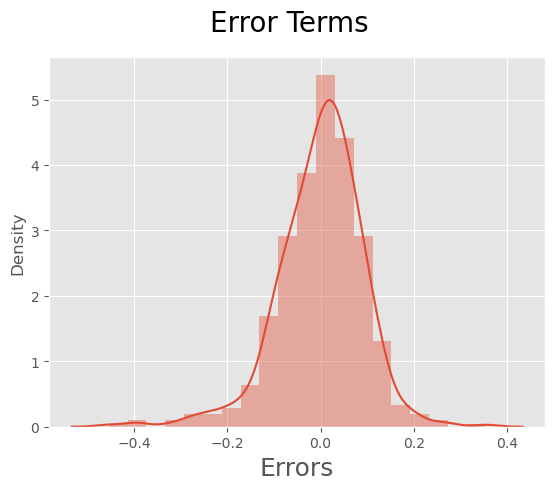

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Inference:
-   Error terms are normally distributed.

#### Verifying the Residuals using QQ Plot


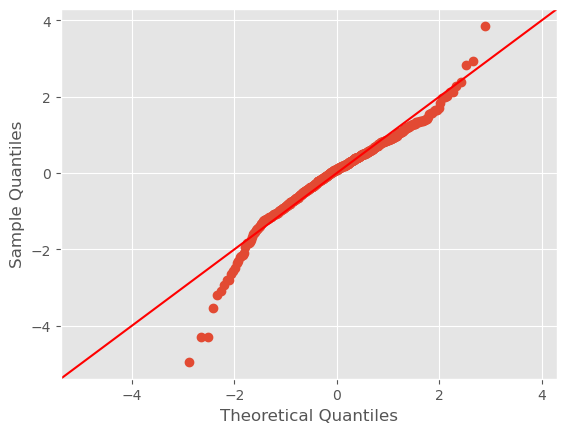

In [105]:
# Verifying same using QQ Plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Error term VS Predicted Values

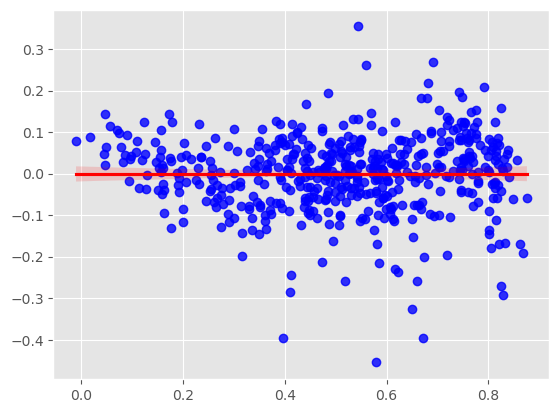

In [107]:
# Plotting the regplot for train_pred vs residuals
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={
            "color": "blue"}, line_kws={"color": "red"})
plt.show()


## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [110]:
# Creating numeric variable list
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Apply the scalling
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Checking the test set after scalling
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [114]:
# Crealting X and y test dataset from df_test dataset
y_test = df_test.pop('cnt')
X_test = df_test

# Creating X and y test dataset from df_test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [117]:
# Now let us use our model to make predictions.

# Creating X_test_new dataframe by dropping the insignificant variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_lm = sm.add_constant(X_test_new)

In [119]:
# Making predictions
y_pred = lm5.predict(X_test_lm)

In [121]:
# let's see the predicted values
y_pred

184    0.457699
535    0.852922
299    0.426299
221    0.570858
152    0.520424
404    0.468448
198    0.517520
171    0.473962
512    0.805012
200    0.572032
509    0.794296
559    0.674982
109    0.493000
467    0.684136
339    0.153600
589    0.814361
222    0.563712
40     0.163149
682    0.589940
453    0.578830
606    0.827420
265    0.549938
510    0.784508
19     0.090467
117    0.396206
423    0.518013
614    0.852566
163    0.493598
630    0.820087
191    0.511022
572    0.789243
662    0.724117
264    0.494378
625    0.665345
325    0.166259
114    0.515853
218    0.586829
678    0.694148
24     0.099723
432    0.393089
395    0.454730
48     0.345429
684    0.634141
203    0.597662
450    0.611729
538    0.795879
73     0.185327
269    0.565964
710    0.532988
98     0.325903
530    0.768225
173    0.483430
418    0.567826
503    0.778992
727    0.345005
550    0.791270
714    0.591272
448    0.586770
248    0.198870
685    0.620234
410    0.520624
201    0.501306
41     0

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

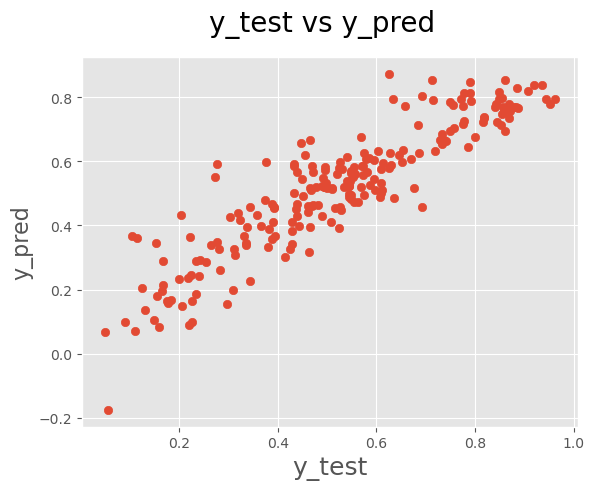

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()    

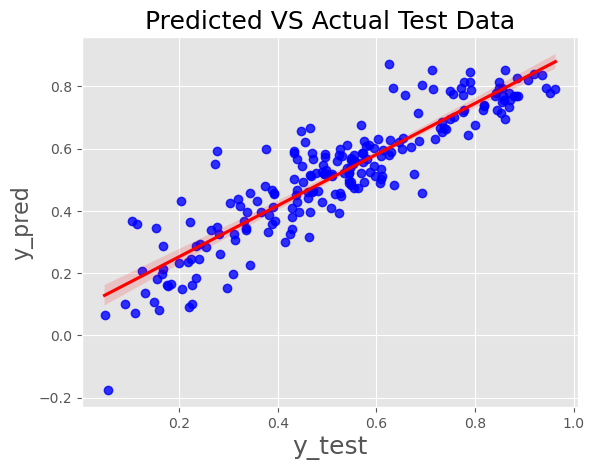

In [125]:
# Plotting y_test and y_pred using sns 
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.title('Predicted VS Actual Test Data', fontdict={'fontsize': 18}) # Heading
plt.show()

#### R-squared score on the test set.

In [127]:
# Caculate the r-squared 
r2_test = r2_score(y_test, y_pred)
r2_test

0.8179598345919716

#### Adjusted R Squaired on test set

In [129]:
# Caculate the adjusted r-squared 
adj_r2 = round(
    1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 3)
print(adj_r2)


0.791


#### Equation for best fit line :

In [131]:
# Coefficent for the variables
round(lm5.params, 3)

const                                            0.293
yr                                               0.236
atemp                                            0.411
windspeed                                       -0.143
season_spring                                   -0.112
season_winter                                    0.058
mnth_December                                   -0.054
mnth_January                                    -0.057
mnth_July                                       -0.059
mnth_November                                   -0.058
mnth_September                                   0.052
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.288
weathersit_Mist-Cloudy_Mist-Broken              -0.080
dtype: float64

## <font color='red'> Final Inferences and Recommendations for the Company: </font>
# Inferences
- Season: Fall Season has the highest demand but Spring Season has the lowest demand for bikes
- 	Weathersit:
	“Clear, Few clouds” weather Situation has highest demand
	“Light Snow, Light Rain” weather situation has lowest demand
-	Year: The year 2018 had low demand but there was high demand in the year 2019. 
-	Month: September month has the highest demand followed by October, August and June but the lowest demand is in January.
-	Holiday: There is high demand in holidays compared to a non- holiday
-	Weekday: There is not high variation in demand in the weekdays

# Recommendations
- The Company should keep a track of the weather situation as the demand increases with increase in temparature
- There is uptrend of the annual demand, the company should focus on long term plans to meet the demand
- September month has the highest demand followed by October, August, hence the company should be prepared to meet the demand
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand